<a href="https://colab.research.google.com/github/gavieira/imersao-dados-2-2020/blob/master/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 04

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# No vídeo, usou a url - facilita uso no Colab

#fonte = "https://raw.githubusercontent.com/gavieira/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"

#dados = pd.read_csv(fonte)
#dados.head()


In [65]:
#Setando variáveis

# Criadas na aula01
dados = pd.read_csv("MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

# Criadas na aula 02
renda_ordenada = np.sort(dados["Q006"].unique()) 
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

# Aula 03
correlacao = dados_sem_notas_zero[provas].corr()

Será que conseguimos prever a nota de uma disciplina baseada na nota de outra?

In [66]:
#Só pra lembrar: o q tínhamos na variavel provas msm?
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [85]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"] # São nossas características, usadas para definir nossa saída
prova_saida = "NU_NOTA_MT" # È a nota que queremos prever
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna() #Remove os NaN (Not a number) para poder fazer o fit no modelo
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]



In [86]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [87]:
x = notas_entrada
y = notas_saida 

In [88]:
# Precisa separar os dados em duas frações:
# Uma para treino do modelo (fazer a máquina aprender)
# Uma para teste do modelo (ver se ele tá bom)
# O sklearn tem um método que faz essa separação de forma bem prática
# Método train_test_split tem o parâmetro random_state, que divide os dados de forma aleatória
# Mas o conjunto de dados usados para treino e teste determina o sucesso do modelo
# Logo, se vc quiser garantir a reprodutibilidade, o ideal é setar ele para ter sempre o mesmo conjunto de dados gerado


from sklearn.model_selection import train_test_split

SEED = 4321 # Poderia ser qqr numero

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [89]:
# Modelo de regressão linear

from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED) #Não queremos fator de aleatoriedade, mas sim que ele gere sempre o mesmo resultado
modelo.fit(x_treino, y_treino) # Ajuste meus dados ao modelo escolhido (LinearSVR). Não pode ter NaN.

/home/gabriel/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR(random_state=4321)

In [72]:
#Baseado nas 4 primeiras notas, estamos prevendo a quinta
# O modelo esta especificamente treinado para receber e analisar essas 4 notas e prever a quinta (de matematica)
# Podemos usar ele pra calcular isso pra outros estudantes que não estão na nossa amostra
#Obs: se eu der nota de qqr outra coisa (ou dar a nota de mat como entrada e esperar a de linguagens como saída), o modelo vai me calcular uma coisa louca
# é tipo eu mostrar uma girafa pra um modelo q discerne entre gato e cachorro
# Para prever a nota de, digamos, redação, temos que pegar um modelo limpo e treinar de novo, passando as outras 4 notas (ou apenas algumas delas) como entrada
#Retorna um array
modelo.predict(x_teste)

array([420.31950108, 478.71700082, 385.7069269 , ..., 471.7623776 ,
       540.54672299, 353.78044694])

In [73]:
#Checando as primeiras posições das notas obtidas de fato (y_teste) são parecidas com as preditas
# E sim, mto embora algumas predições seja mais acuradas que outras..
y_teste[:5]

114991    459.7
104685    617.2
91028     520.0
115802    703.8
93303     627.1
Name: NU_NOTA_MT, dtype: float64

In [74]:
# Mas como avaliar se o modelo está se saindo de forma satisfatória no geral?
# Uma forma de se fazer isso é plotando um scatterplot com os resultados observados e preditos
# Para isso, precisamos botar a predição numa variável

predicoes_matematica = modelo.predict(x_teste)

(-50.0, 1050.0)

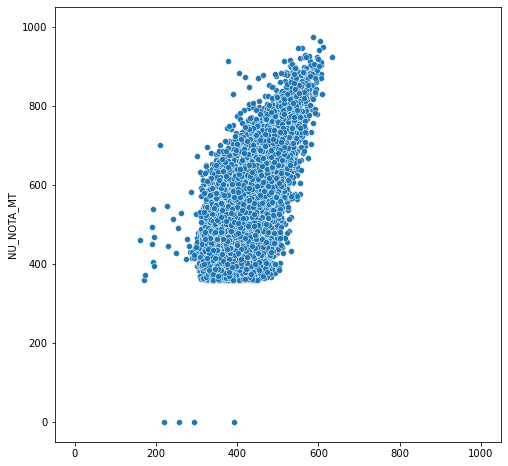

In [75]:
# Plotando o scatterplot
# Se tivesse acertado tudo, teríamos uma linha mais diagonal
plt.figure(figsize=(8, 8))
sns.scatterplot(x=predicoes_matematica, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

<AxesSubplot:xlabel='NU_NOTA_MT', ylabel='NU_NOTA_MT'>

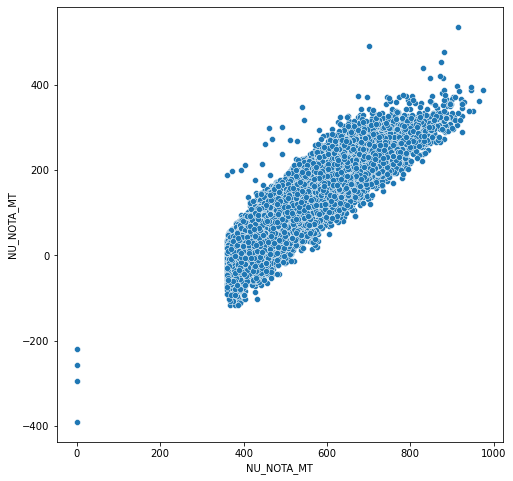

In [76]:
#Pegando a diferença entre o real e o predito (erro)
#O eixo y vai ter o meu erro

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=y_teste - predicoes_matematica)

#O modelo chuta valores tanto pra cima quanto pra baixo
#Aqui o erro não está distribuído uniformemente: tem uma correlação, uma tendência
#Se não tivesse tendencia, as notas estariam distribuídas numa massa amorfa. Claramente há uma correlação
#Esse viés do nosso modelo é: Quando a nota é baixa, ele chuta pra baixo(negativo), quando é alta, chuta pra cima (positivo)
#Ele cria uma desigualdade entre as pessoas ainda maior que o observado. O modelo n ão está bom para prever.

(-50.0, 1050.0)

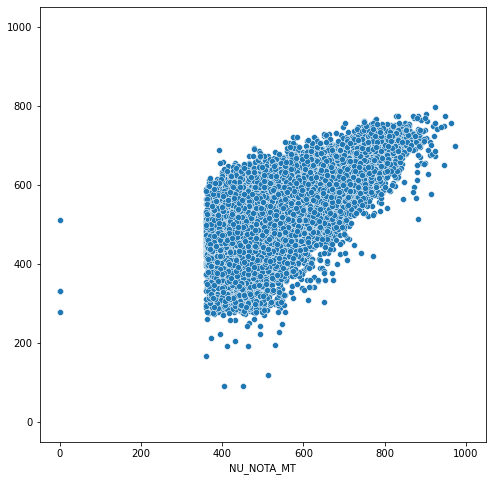

In [77]:
#Usando modelo mais simples (considera apenas a média do nosso dado de teste)
# O chute, no caso, seria pegar a média das 4 outras notas e dizer q essa média vai ser a nota de matemática (a predição é a média, q é um modelo bem mais simples)
# Comparar ele com o modelo svr

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_teste, y=x_teste.mean(axis=1)) #Compara o y com base na média das 4 notas por pessoa
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

In [78]:
#Até agora, analisamos os resultados da predição de forma qualitativa
#Podemos tbm analisa-los de forma quantitativa
#Vamos adicionar essas métricas a um novo dataframe 

resultados = pd.DataFrame() #Criando dataframe vazio
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["diferenca"] = resultados["Real"] - resultados["Previsao"]
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2 # Quadrado da diferença permite à gente tirar média sem problemas 
#Se tiver dois valores, um q errou 300 pra cima e outro 300 pra baixo (-300), a média dá 0 e a gente é levado a acreditar que na verdade não houve diferença entre os chutes e a realidade ou que essa diferença foi menor q a diferença real
#Logo, acharíamos que o modelo é melhor do que ele realmente é
#Logo, não pode somar erros positivos com negativos - uma outra solução poderia pegar o módulo da diferença,imagino

#Qual é melhor ou pior? Positivo ou negativo?
#Depende muito do caso que estamos analisando
#Detecção de covid: é pior o erro negativo, pois a pessoa que acha que não tem covid e tem pode transmitir para outros

In [79]:
resultados

,Real,Previsao,diferenca,quadrado_diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [80]:
#Média do quadrado das diferenças

resultados["quadrado_diferenca"].mean()

#Bem grande (maior q a nota maxima da prova de mat do enem, inclusive), mas é pq é quadrado msm

18324.11972400897

In [81]:
#Raiz quadrada do quadrado das diferencas
resultados["quadrado_diferenca"].mean()**(1/2)
#Média mais realista
# O modelo tá errando em média 135 pontos, tanto pra cima quanto pra baixo

135.36661229420264

In [82]:
# Só com o número é difícil dizer se o modelo é bom ou ruim
#O ideal é comparar com outro modelo pra ver se o nosso está bom ou ruim
# O scikit-learn nos permite fazer um outro modelo (Dummy) de forma relativamente simple
# Depois, podemos fazer a comparação com um outro modelo (Dummy) - aparentemente, é tipo comparar um modelo com um modelo nulo

from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [83]:
#Scikit-learn possuivarias métricas já prontas, dentre elas a raiz do quadrado da média dos erros

from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [84]:
mean_squared_error(y_teste, predicoes_matematica)

18324.11972400897

Desafio01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula

Desafio02: Ler a documentação do Dummy e alterar o método de regressão

Desafio03: Buscar outra métrica para avaliar modelos de regressão
